In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mumbai-rainfall-data/mumbai-monthly-rains.csv


In [2]:
df=pd.read_csv("/kaggle/input/mumbai-rainfall-data/mumbai-monthly-rains.csv")

In [3]:
df.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


## WE WILL REFRAME THE DATA WITH 3 COLUMNS - YEAR, MONTH AND RAIN

In [4]:
years=df.Year.unique()
df_years=[]
df_months=[]
rains=[]
total=[]
months = ['Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
for year in years:
    for month in months:
        df_years.append(year)
        df_months.append(month)
        rains.append(df[(df.Year==year)][month].iloc[0])
        
        
        
        
        

In [5]:
new_df=pd.DataFrame()
new_df['Year']=df_years
new_df['Month']=df_months
new_df['Rain']=rains


In [6]:
def month_to_number(x):
    if x=='Jan':
        return 1
    elif x=='Feb':
        return 2
    elif x=='Mar':
        return 3
    elif x=='April':
        return 4
    elif x=='May':
        return 5
    elif x=='June':
        return 6
    elif x=='July':
        return 7
    elif x=='Aug':
        return 8
    elif x=='Sept':
        return 9
    elif x=='Oct':
        return 10
    elif x=='Nov':
        return 11
    else:
        return 12
        

In [7]:
new_df['Month']=new_df['Month'].apply(lambda s:month_to_number(s))

## TRANSFORMED DATAFRAME

In [8]:
new_df

,Year,Month,Rain
0,1901,1,13.116602
1,1901,2,0.000000
2,1901,3,0.000000
3,1901,4,3.949669
4,1901,5,17.139791
...,...,...,...
1447,2021,8,323.199896
1448,2021,9,601.247517
1449,2021,10,36.040432
1450,2021,11,25.156942


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Rain'}>, <Axes: >]], dtype=object)

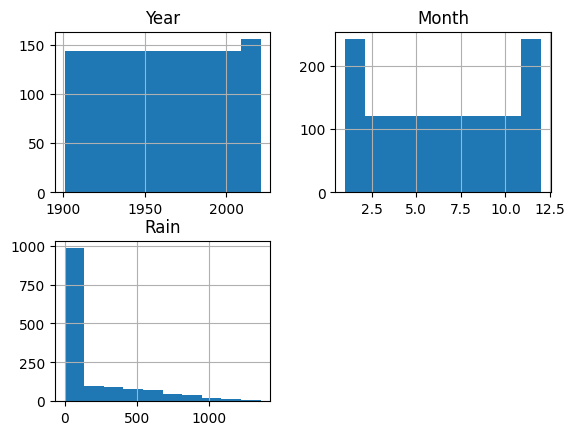

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
new_df.hist()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


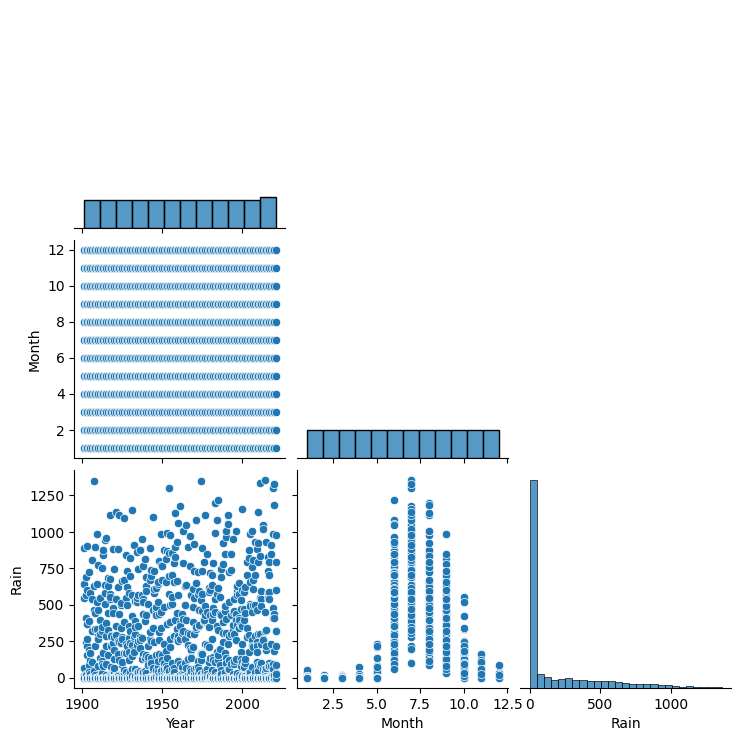

In [10]:
sns.pairplot(new_df,corner=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


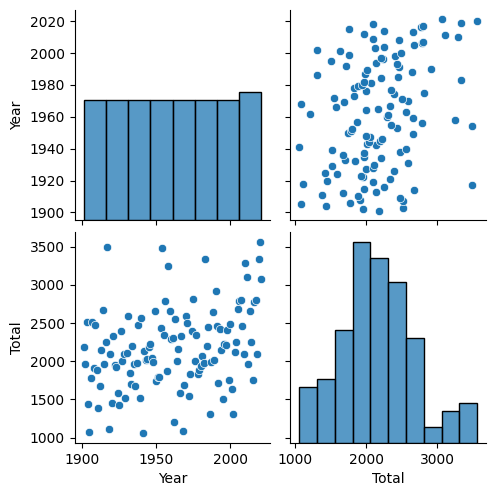

In [11]:
sns.pairplot(df[['Year','Total']])

<Axes: xlabel='Year', ylabel='Total'>

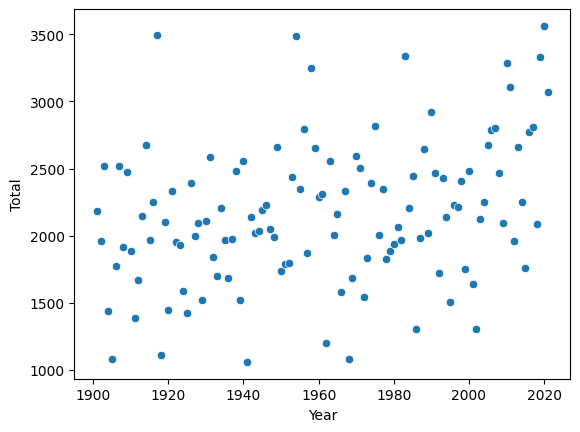

In [12]:
sns.scatterplot(y=df['Total'],x=df['Year'])

## REMOVE OUTLIERS

<Axes: >

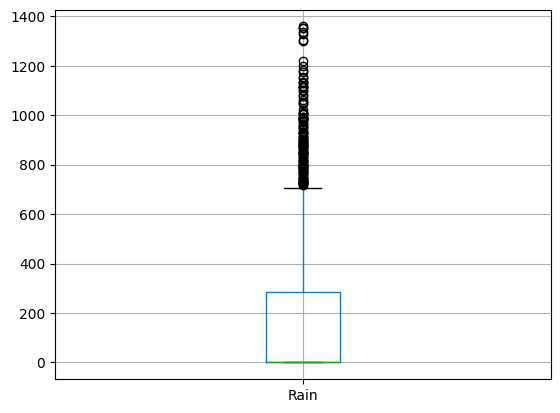

In [13]:
new_df[['Rain']].boxplot()

In [14]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df_clean=remove_outlier(new_df,'Rain')

<Axes: >

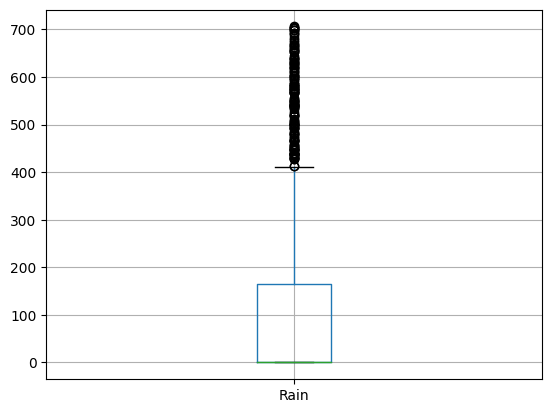

In [15]:
df_clean[['Rain']].boxplot()

<Axes: >

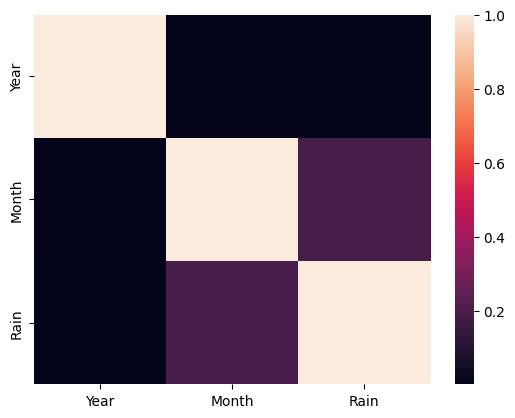

In [16]:
sns.heatmap(df_clean.corr().abs())

## PREDICTIONS USING REGRESSION

In [17]:
from sklearn.model_selection import train_test_split
X=['Year','Month']
Y=['Rain']
X_train,X_test,Y_train,Y_test= train_test_split(df_clean[X],df_clean[Y],test_size=0.25)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

models ={
    "RandomForest":RandomForestRegressor( bootstrap=True, criterion='squared_error', max_depth= 49, max_features= 'auto', min_samples_leaf= 9, min_samples_split= 2, n_estimators= 250),
    "DecisionTree":DecisionTreeRegressor(),
    "LinearRegression":LinearRegression()
    
}

In [19]:
from sklearn.metrics import r2_score
result = pd.DataFrame()
names=[]
r2square=[]
for name,model in models.items():
    model.fit(X_train,Y_train)
    ypred = model.predict(X_test)
    r2square.append(r2_score(Y_test,ypred))
    names.append(name)
    

/tmp/ipykernel_17/3732176856.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [20]:
result['Model']=names
result['R2 Square']=r2square

In [21]:
result

,Model,R2 Square
0,RandomForest,0.779701
1,DecisionTree,0.537818
2,LinearRegression,0.036708


## RANDOM FOREST FITS THE DATA BEST WITH R2 SCORE of 73.2%